In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

pd.options.display.float_format = '{:.2f}'.format 
pd.pandas.set_option('display.max_columns',None)

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


## Problem Statement

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as 
1. Denying the loan, 
2. Reducing the amount of loan, 
    3. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.
3. Lending (to risky applicants) at a higher interest rate, etc.



Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

## Important Columns Post Manual Assesment by looking at data

1. loan_amount
2. funded_amount
3. funded_amount_inv
4. term
5. int_rate
6. installment
7. grade
8. emp_title
9. emp_length
10. home_ownership
11. annual_inc
12. verification_status
13. issue_d
14. loan_status
15. purpose 
16. revol_bal
17. revol_util
18. total_pymnt
19. total_pymnt_inv
20. total_pymnt_inv
21. total_rec_int
22. total_rec_late_fee
23. recoveries
24. application_type
25. dti
26. zip_code

## Observation Post Manual Assesment
1. The loan int_rate values is influency by following columns
    1. loan_status
        - The applicant with loan_status paid has lesser int_rate compare to applicant with loan_status as Charged off
    2. Grade
        - Higher Grade applicant will have more salary can also ask for lesser int_rest.
    3. annual_income 
    4. verification_status
        - Verfication status also can reveal the applicants credebility to get the loan.
    5. emp_length
        - emp_length also points out whether the application is trusted to their employeer.Which can build sense of trust with the lender.
    6. home_onwership 
        - Applicant staying on rent would have lower probability to get lower int_rate.
        
2. Whether loan is given or not can be analyse by looking at the loan_status column

3. zip_code also can give a overview of defaulter per region. Based on that strict rule can be applied to that region.

4. purpose also can give a overview of defaulter per purpose. Based on that strict rule can be applied to that area of loan.

5. DTI 
    - The debt-to-income (DTI) ratio measures the percentage of a person's monthly income that goes to debt payments.
    - A low DTI ratio indicates sufficient income relative to debt servicing, and it makes a borrower more attractive.
    - You can lower your debt-to-income ratio by reducing your monthly recurring debt or increasing your gross monthly income.

## Observation on Issues Post Manual Assesment

1. Emp_title is empty for some of the applicants. However Emp_title columns does not look relevant for the analysis
2. zip_code unwanted suffix "xx"
3. desc is empty for some of the applicants.
4. term should be a numerical column and unit can be describe as metadata for better processing.
5. emp_length should be a numerical column and unit can be describe as metadata for better processing.
6. issue_d can be split into two columns
7. delinq_2yrs - most of the values are zero
8. pub_rec - most of the values are zero
9. revol_bal - % can be removed for better analysis
10. out_prncp - most of the values are zero
11. out_prncp_inv -  most of the values are zero
12. total_rec_late_fee -  most of the values are zero
13. recoveries - most of the values are zero
14. last_pymnt_d can be splited into two columns month and day.
15. collection_recovery_fee - most of the values are zero
16. next_pymnt_d can be splited into two columns month and day. Most of values are empty.
17. last_credit_pull_d - can be splited into two columns month and day.
18. collections_12_mths_ex_med - most of the values are zero
19. mths_since_last_major_derog - most of the values are NA
20. annual_inc_joint , dti_joint , verification_status_joint , tot_coll_amt , tot_cur_bal , open_acc_6m , open_il_6m , open_il_12m,
    open_il_24m , mths_since_rcnt_il , total_bal_il , il_util , open_rv_12m , open_rv_24m , max_bal_bc , all_util , total_rev_hi_lim , 
    inq_fi , total_cu_tl , inq_last_12m , acc_open_past_24mths , avg_cur_bal , bc_open_to_buy,bc_util etc .. - Most of the coulmns has values "NA"
    
Above parameters can be combined to draw some inferences.


We can include many more column post the data accessing phase thourgh pandas.

## Data Wrangling

##################### Data Gathering #####################

In [79]:
df = pd.read_csv('loan.csv',dtype='unicode')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [4]:
df.shape

(39717, 111)

## Overview of the Data
The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

The data set has 39717 applicant loan information having 111 lending attributes.

## Column Description

## Data Accessing
1. Check for duplicates
2. Check for missing data
3. Check for inaccurate data
4. Check for inacurate data types
5. Check for strutcural issue with the data

## Data Cleaning
1. Remove for duplicates
2. Remove for missing data
3. Fix for inaccurate data
4. Fix for inacurate data types
5. Fix for strutcural issue with the data

In [80]:
## Overview of data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [81]:
## Overview of data
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0,0,13,0,7274,13.10%,40,f,0,0,2822.969293,1213.88,2500,322.97,0,0,0,Jul-10,80.9,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.4,1,Dec-86,1,5,0,6,0,8847,26.90%,9,f,0,0,9913.491822,1020.51,8500,1413.49,0,0,0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,1e+05,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.3,0,Oct-98,0,0,0,11,0,9698,19.40%,20,f,0,0,5272.161128,1397.12,5000,272.16,0,0,0,Apr-08,0,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,2e+05,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0,0,17,0,85607,0.70%,26,f,0,0,5174.198551,672.66,5000,174.2,0,0,0,Jan-08,0,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,869

In [82]:
## Overview of data
df.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
8298,867869,1081502,1400,1400,1400,36 months,5.99%,42.59,A,A2,nj transit,4 years,MORTGAGE,92000,Not Verified,Aug-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/29/11 > This loan is to...,other,personal loan,088xx,NJ,6.39,0,Oct-02,0,NaN,NaN,9,0,3351,13.40%,19,f,0,0,1533.018543,1533.02,1400,133.02,0,0,0,Sep-14,43.15,NaN,Sep-14,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


### Observation 
## Most of the column has value empty , o or NA . Column need to be removed from data frame pre analysis.

In [83]:
## Column informations
df.info(verbose=True, show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

### No Duplicate found as the operation returns empty record

In [84]:
## Check for duplicates
df[df.duplicated(subset=None, keep='first')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


### Mean , Median ,Standard deviation , min and max are not getting generated because of column type being object.

In [85]:
## Mathemtical Summary
df.describe() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26526,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


### No duplicate rows found

In [86]:
## No of Empty Rows
print(df.isnull().all(axis=1).sum())

0


## 54 Empty column found

In [87]:
## No of Empty Column
print(df.isnull().all(axis=0).sum())

54


In [88]:
## Find out name of the empty column to drop them from the data set as they will not contribute to the analysis
dfs = df.isnull().sum()
dropColumns = dfs[dfs==39717].index

## Drop empty columns
df = df.drop(columns = dropColumns)


In [89]:
## Find what extra column can be dropped by looking at the dataframe info Non-Null Parameter and check the relevance of the column to drive the business analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  object
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_title                   37258 non-null  object
 11  emp_length                  38642 non-null  object
 12  home_ownership              39717 non-null  object
 13  annual_inc                  39717 non-null  ob

In [90]:
## Drop column which has lower cardinality
df = df.drop(columns = ['mths_since_last_record','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med',      
                        'delinq_amnt','tax_liens','desc','url','emp_title','member_id','policy_code','pymnt_plan',
                       'total_rec_late_fee','collection_recovery_fee','last_credit_pull_d','recoveries',      
                        'out_prncp_inv','out_prncp','mths_since_last_delinq','earliest_cr_line','delinq_2yrs','title','installment'])


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    39717 non-null  object
 1   loan_amnt             39717 non-null  object
 2   funded_amnt           39717 non-null  object
 3   funded_amnt_inv       39717 non-null  object
 4   term                  39717 non-null  object
 5   int_rate              39717 non-null  object
 6   grade                 39717 non-null  object
 7   sub_grade             39717 non-null  object
 8   emp_length            38642 non-null  object
 9   home_ownership        39717 non-null  object
 10  annual_inc            39717 non-null  object
 11  verification_status   39717 non-null  object
 12  issue_d               39717 non-null  object
 13  loan_status           39717 non-null  object
 14  purpose               39717 non-null  object
 15  zip_code              39717 non-null

In [92]:
df.sample()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies
13472,775014,12000,12000,12000,60 months,12.87%,C,C1,10+ years,MORTGAGE,46968,Source Verified,Jun-11,Fully Paid,other,483xx,MI,16.5,1,11,0,32517,59.40%,29,f,16002.49873,16002.5,12000,4002.5,Feb-15,4323.39,NaN,INDIVIDUAL,0


In [93]:
df.shape

(39717, 34)

In [94]:
## Fixing NAN by replacing with 0
df['emp_length'].unique()
df['emp_length'].fillna('0',inplace = True)
df['emp_length'].unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0'],
      dtype=object)

In [95]:
## Removing 'year' suffix to make the column suitable for ananlysis
df['emp_length'] = df['emp_length'].str.extract('(\d+)')
df['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', '0'],
      dtype=object)

In [96]:
## Fixing int_rate column by removing '%' to make the column suitable for analysis
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['int_rate'].unique()

array(['10.65', '15.27', '15.96', '13.49', '12.69', '7.90', '18.64',
       '21.28', '14.65', '9.91', '16.29', '6.03', '11.71', '12.42',
       '14.27', '16.77', '7.51', '8.90', '18.25', '6.62', '19.91',
       '17.27', '17.58', '21.67', '19.42', '22.06', '20.89', '20.30',
       '23.91', '19.03', '23.52', '23.13', '22.74', '22.35', '24.11',
       '6.00', '22.11', '7.49', '11.99', '5.99', '10.99', '9.99', '18.79',
       '11.49', '8.49', '15.99', '16.49', '6.99', '12.99', '15.23',
       '14.79', '5.42', '10.59', '17.49', '15.62', '21.36', '19.29',
       '13.99', '18.39', '16.89', '17.99', '20.62', '20.99', '22.85',
       '19.69', '20.25', '23.22', '21.74', '22.48', '23.59', '12.62',
       '18.07', '11.63', '7.91', '7.42', '11.14', '20.20', '12.12',
       '19.39', '16.11', '17.54', '22.64', '13.84', '16.59', '17.19',
       '12.87', '20.69', '9.67', '21.82', '19.79', '18.49', '22.94',
       '24.59', '24.40', '21.48', '14.82', '14.17', '7.29', '17.88',
       '20.11', '16.02', '17

In [97]:
df.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000,863.16,Jan-15,171.62,NaN,INDIVIDUAL,0


In [98]:
## Fixing revol_util column by removing '%' to make the column suitable for analysis
df['revol_util'] = df['revol_util'].str.rstrip('%')
df['revol_util'].unique()




array(['83.70', '9.40', '98.50', ..., '49.63', '0.04', '7.28'],
      dtype=object)

In [99]:
## checking unique term values
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [100]:
## Fixing term column by removing 'months' to make the column suitable for analysis

df['term'] = df['term'].str.split('months').str[0]
df['term'] = df['term'].str.strip()
df['term'].unique()

array(['36', '60'], dtype=object)

In [101]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36,10.65,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70,9,f,5863.155187,5833.84,5000,863.16,Jan-15,171.62,NaN,INDIVIDUAL,0
1,1077430,2500,2500,2500,60,15.27,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,GA,1,5,3,0,1687,9.40,4,f,1008.71,1008.71,456.46,435.17,Apr-13,119.66,NaN,INDIVIDUAL,0
2,1077175,2400,2400,2400,36,15.96,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50,10,f,3005.666844,3005.67,2400,605.67,Jun-14,649.91,NaN,INDIVIDUAL,0
3,1076863,10000,10000,10000,36,13.49,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20,1,10,0,5598,21,37,f,12231.89,12231.89,10000,2214.92,Jan-15,357.48,NaN,INDIVIDUAL,0
4,1075358,3000,3000,3000,60,12.69,B,B5,1,RENT,80000,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90,38,f,3513.33,3513.33,2475.94,1037.39,May-16,67.79,Jun-16,INDIVIDUAL,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    39717 non-null  object
 1   loan_amnt             39717 non-null  object
 2   funded_amnt           39717 non-null  object
 3   funded_amnt_inv       39717 non-null  object
 4   term                  39717 non-null  object
 5   int_rate              39717 non-null  object
 6   grade                 39717 non-null  object
 7   sub_grade             39717 non-null  object
 8   emp_length            39717 non-null  object
 9   home_ownership        39717 non-null  object
 10  annual_inc            39717 non-null  object
 11  verification_status   39717 non-null  object
 12  issue_d               39717 non-null  object
 13  loan_status           39717 non-null  object
 14  purpose               39717 non-null  object
 15  zip_code              39717 non-null

In [103]:
## Convert columns to numerics to perform analysis
cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','annual_inc','dti','emp_length','total_pymnt','total_pymnt_inv'
       ,'inq_last_6mths','total_rec_prncp','total_rec_int','last_pymnt_amnt','term','pub_rec_bankruptcies']
df[cols] = df[cols].apply(pd.to_numeric)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  object 
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  int64  
 5   int_rate              39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [105]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36,10.65,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70,9,f,5863.16,5833.84,5000.00,863.16,Jan-15,171.62,NaN,INDIVIDUAL,0.00
1,1077430,2500,2500,2500.00,60,15.27,C,C4,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40,4,f,1008.71,1008.71,456.46,435.17,Apr-13,119.66,NaN,INDIVIDUAL,0.00
2,1077175,2400,2400,2400.00,36,15.96,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50,10,f,3005.67,3005.67,2400.00,605.67,Jun-14,649.91,NaN,INDIVIDUAL,0.00
3,1076863,10000,10000,10000.00,36,13.49,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21,37,f,12231.89,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,INDIVIDUAL,0.00
4,1075358,3000,3000,3000.00,60,12.69,B,B5,1,RENT,80000.00,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90,38,f,3513.33,3513.33,2475.94,1037.39,May-16,67.79,Jun-16,INDIVIDUAL,0.00


In [106]:
## issue_id column need to split into two columns month and days for bettern anaylysis
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_d_year'] = df['issue_d'].dt.year
df['issue_d_month'] = df['issue_d'].dt.month


In [107]:
df.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
initial_list_status         0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
last_pymnt_d               71
last_pymnt_amnt             0
next_pymnt_d            38577
application_type            0
pub_rec_ba

In [108]:
print(df['next_pymnt_d'].unique())

[nan 'Jun-16' 'Jul-16']


In [109]:
## Fix invalid data for pub_rec_bankruptcies column
print(df['pub_rec_bankruptcies'].unique())
df['pub_rec_bankruptcies'].fillna(0,inplace= True)

[ 0.  1.  2. nan]


In [110]:
## Fix invalid data for revol_util column

print(df['revol_util'].unique())
df['revol_util'].fillna('0',inplace= True)

['83.70' '9.40' '98.50' ... '49.63' '0.04' '7.28']


In [111]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,5000,4975.00,36,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70,9,f,5863.16,5833.84,5000.00,863.16,Jan-15,171.62,NaN,INDIVIDUAL,0.00,2011,12
1,1077430,2500,2500,2500.00,60,15.27,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40,4,f,1008.71,1008.71,456.46,435.17,Apr-13,119.66,NaN,INDIVIDUAL,0.00,2011,12
2,1077175,2400,2400,2400.00,36,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50,10,f,3005.67,3005.67,2400.00,605.67,Jun-14,649.91,NaN,INDIVIDUAL,0.00,2011,12
3,1076863,10000,10000,10000.00,36,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21,37,f,12231.89,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,INDIVIDUAL,0.00,2011,12
4,1075358,3000,3000,3000.00,60,12.69,B,B5,1,RENT,80000.00,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,15,0,27783,53.90,38,f,3513.33,3513.33,2475.94,1037.39,May-16,67.79,Jun-16,INDIVIDUAL,0.00,2011,12


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  object        
 1   loan_amnt             39717 non-null  int64         
 2   funded_amnt           39717 non-null  int64         
 3   funded_amnt_inv       39717 non-null  float64       
 4   term                  39717 non-null  int64         
 5   int_rate              39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  int64         
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

## Column Types

1. Numerical - loan_amnt , funded_amnt , funded_amnt_inv , int_rate , installment , emp_length , annual_inc , dti , revol_bal , revol_util , total_acc , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int , last_pymnt_amnt , pub_rec_bankruptcies
2. Categorical - grade , sub_grade , home_ownership , verification_status , loan_status , purpose , zip_code , addr_state , initial_list_status , application_type
3. Mixed - term

## Univariate Analysis
1. Distribution Analysis
    - Shape , Central Tendency & Dispersion

### Numerical Columns

#### loan_amount
#### Conculsion
1. loan_Amount has outliers post 30000 however looking at the data above 30000 , many applicants taken loan above 30000. So we can not tell these are outlier , but the values are quite high.
2. The distribution is positive skewed

In [113]:
df['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<Axes: ylabel='Frequency'>

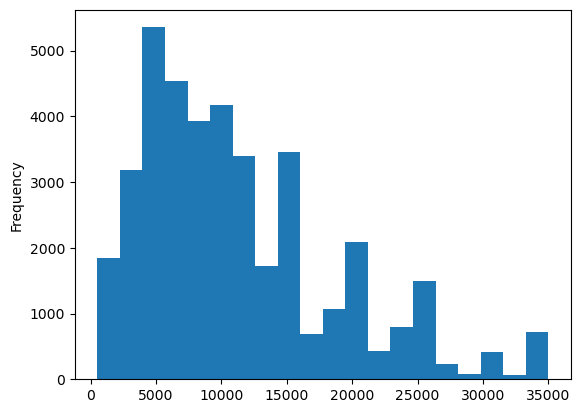

In [114]:
df['loan_amnt'].plot(kind='hist',bins = 20)

<Axes: ylabel='Density'>

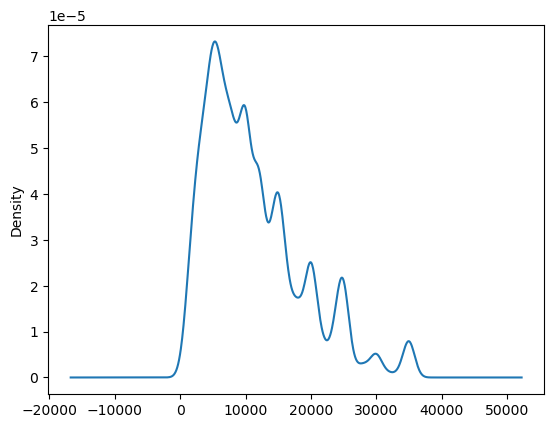

In [115]:
df['loan_amnt'].plot(kind='kde')

In [116]:
df['loan_amnt'].skew()

1.0593172896133878

<Axes: >

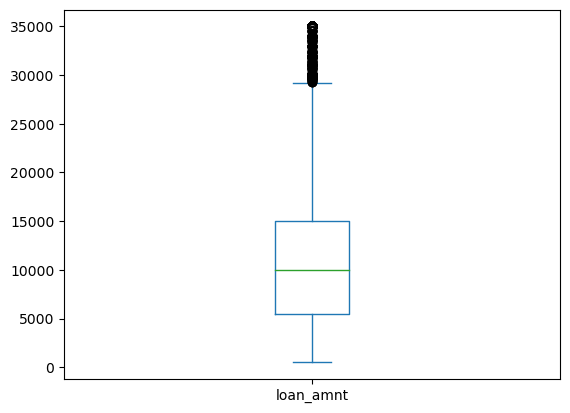

In [117]:
df['loan_amnt'].plot(kind='box')

In [118]:
df[df['loan_amnt']>30000]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies,issue_d_year,issue_d_month
31,1069539,31825,31825,31825.00,36,7.90,A,A4,5,MORTGAGE,75000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,080xx,NJ,14.03,0,12,0,23151,27.40,26,f,34886.91,34886.91,31825.00,3061.91,Aug-13,16966.70,NaN,INDIVIDUAL,0.00,2011,12
80,1068994,35000,22075,22050.00,60,17.27,D,D3,3,MORTGAGE,150000.00,Verified,2011-12-01,Fully Paid,home_improvement,115xx,NY,7.51,1,11,0,7334,53.30,31,f,28887.10,28854.39,22075.00,6812.10,Feb-14,15660.22,NaN,INDIVIDUAL,0.00,2011,12
128,1068159,35000,35000,35000.00,36,8.90,A,A5,6,MORTGAGE,125000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,928xx,CA,22.71,0,8,0,9051,34.80,32,f,40009.01,40009.01,35000.00,5009.01,Jan-15,1123.85,NaN,INDIVIDUAL,0.00,2011,12
185,1067084,35000,35000,35000.00,36,10.65,B,B2,2,MORTGAGE,168000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,775xx,TX,3.17,1,16,0,1099,1.40,22,f,38061.50,38061.50,35000.00,3061.50,Oct-13,272.59,NaN,INDIVIDUAL,0.00,2011,12
268,1066155,35000,26825,26800.00,60,18.64,E,E1,8,MORTGAGE,85000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,604xx,IL,12.00,1,16,0,31071,53,50,f,28062.24,28036.09,26825.00,1237.24,Mar-12,26684.35,NaN,INDIVIDUAL,0.00,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,670409,35000,35000,31845.22,60,18.99,F,F3,10,RENT,128000.00,Verified,2011-02-01,Fully Paid,debt_consolidation,115xx,NY,12.27,0,7,0,29759,97.30,14,f,49121.62,42084.17,35000.00,14121.62,Sep-13,21923.25,NaN,INDIVIDUAL,0.00,2011,2
19760,670133,33000,33000,29044.28,60,16.77,E,E2,0,MORTGAGE,107507.76,Verified,2011-02-01,Fully Paid,debt_consolidation,983xx,WA,20.04,1,6,0,54285,68.50,24,f,48963.55,40914.30,33000.00,15963.55,Feb-16,816.01,NaN,INDIVIDUAL,0.00,2011,2
19800,669297,32000,32000,31684.90,60,20.85,G,G3,5,RENT,62400.00,Verified,2011-02-01,Fully Paid,debt_consolidation,018xx,MA,13.04,0,4,0,27618,97.20,11,f,44455.80,43592.80,32000.01,12455.79,Apr-13,22899.00,NaN,INDIVIDUAL,0.00,2011,2
19811,666337,32000,32000,31569.14,60,19.74,F,F5,8,RENT,93500.00,Verified,2011-02-01,Fully Paid,debt_consolidation,112xx,NY,16.36,0,10,1,33036,73.90,12,f,50513.52,49420.35,31961.81,18551.71,Feb-16,842.34,NaN,INDIVIDUAL,1.00,2011,2


#### total_pymnt
#### Conculsion
1. total_pymnt has outliers post 35000 however looking at the data above 35000 , many applicants paid the total amount above 35000. So we can not tell these are outlier , but the values are quite high.
2. The distribution is positive skewed

In [119]:
df['total_pymnt'].describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<Axes: ylabel='Frequency'>

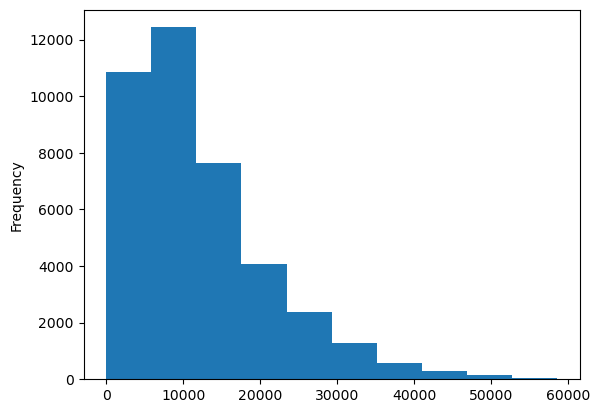

In [120]:
df['total_pymnt'].plot(kind= 'hist')

<Axes: ylabel='Density'>

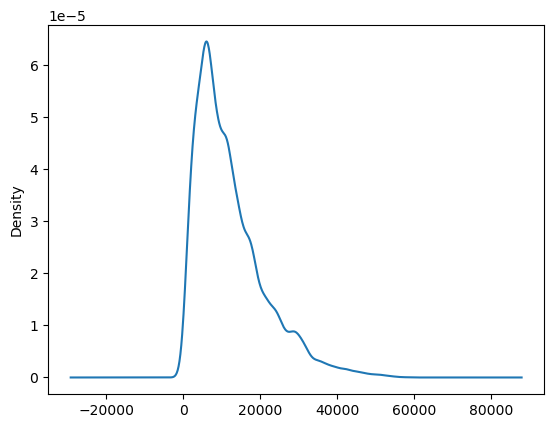

In [121]:
df['total_pymnt'].plot(kind= 'kde')

In [122]:
df['total_pymnt'].skew()

1.3398573657820492

<Axes: >

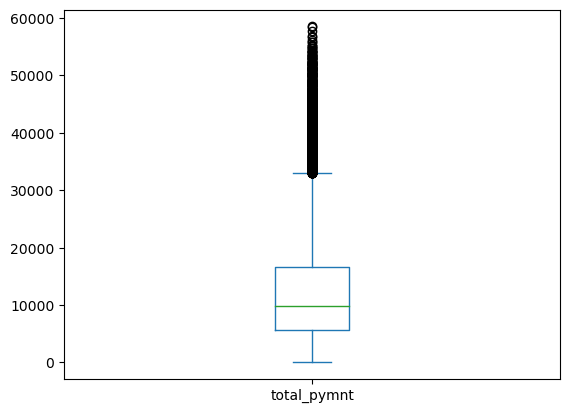

In [123]:
df['total_pymnt'].plot(kind='box')

In [124]:
df[df['total_pymnt']>50000]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies,issue_d_year,issue_d_month
431,1057239,35000,35000,32763.06,60,19.42,E,E3,8,RENT,195000.00,Verified,2011-12-01,Current,debt_consolidation,981xx,WA,11.72,2,17,0,29573,66.10,27,f,54427.23,48913.25,34911.47,19515.76,May-16,916.03,Jun-16,INDIVIDUAL,0.00,2011,12
996,1057770,35000,35000,33906.19,60,20.30,E,E5,10,MORTGAGE,85000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,802xx,CO,12.54,2,9,0,29254,66,20,f,55139.00,52433.53,35000.00,20139.00,Jan-16,10348.28,NaN,INDIVIDUAL,0.00,2011,12
1177,1054552,35000,35000,35000.00,60,20.89,F,F1,1,MORTGAGE,174000.00,Verified,2011-12-01,Current,home_improvement,300xx,GA,5.32,1,10,0,13393,26.50,22,f,50051.69,50051.69,28817.14,21234.55,May-16,944.71,Jun-16,INDIVIDUAL,0.00,2011,12
1685,1026253,35000,35000,34975.00,60,20.89,F,F1,10,MORTGAGE,100000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,535xx,WI,9.31,2,16,0,11818,40.20,54,f,52413.14,52375.70,35000.00,17413.14,Dec-14,19356.95,NaN,INDIVIDUAL,0.00,2011,12
2123,1040391,35000,35000,34975.00,60,19.03,E,E2,10,MORTGAGE,150000.00,Verified,2011-12-01,Fully Paid,home_improvement,166xx,PA,24.74,1,12,0,17963,34.30,32,f,50122.84,50087.04,35000.00,15122.84,Oct-14,20153.38,NaN,INDIVIDUAL,0.00,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19178,680206,35000,35000,30355.35,60,17.51,E,E4,5,OWN,65000.00,Verified,2011-03-01,Fully Paid,home_improvement,342xx,FL,13.38,2,2,0,15124,65.80,7,f,52022.39,45102.82,35000.00,17022.39,Feb-16,1736.90,NaN,INDIVIDUAL,0.00,2011,3
19206,679706,35000,35000,34938.13,60,16.02,D,D5,3,MORTGAGE,87500.00,Verified,2011-02-01,Fully Paid,debt_consolidation,801xx,CO,22.13,1,9,0,14064,44.60,25,f,51090.06,50955.06,35000.00,16090.06,Mar-16,850.97,NaN,INDIVIDUAL,0.00,2011,2
19498,672549,35000,35000,29012.69,60,17.14,E,E3,9,MORTGAGE,84615.00,Verified,2011-02-01,Fully Paid,credit_card,490xx,MI,10.99,0,10,0,27858,92.40,36,f,52348.52,39953.18,35000.00,17348.52,Mar-16,872.20,NaN,INDIVIDUAL,0.00,2011,2
19811,666337,32000,32000,31569.14,60,19.74,F,F5,8,RENT,93500.00,Verified,2011-02-01,Fully Paid,debt_consolidation,112xx,NY,16.36,0,10,1,33036,73.90,12,f,50513.52,49420.35,31961.81,18551.71,Feb-16,842.34,NaN,INDIVIDUAL,1.00,2011,2


#### annual_inc
#### Conculsion
1. annual_inc has outliers , which need to be removed.
2. Post removal the skewed ness is decreased.

In [125]:
df['annual_inc'].describe()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

<Axes: ylabel='Frequency'>

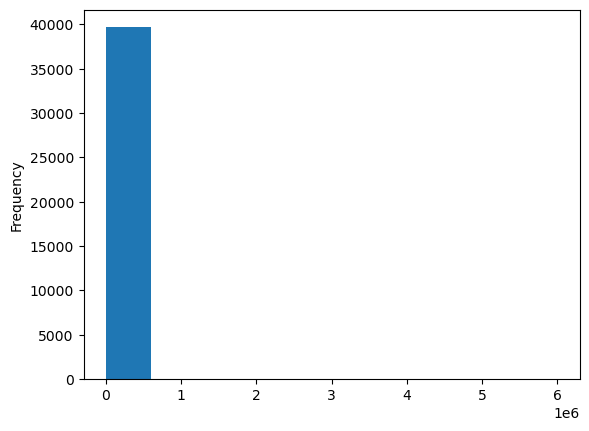

In [126]:
df['annual_inc'].plot(kind='hist')

<Axes: ylabel='Density'>

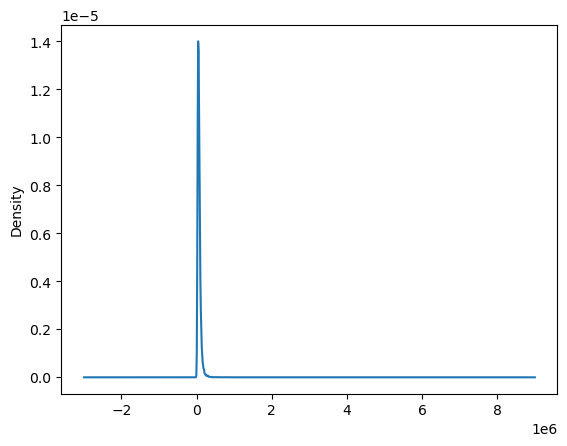

In [127]:
df['annual_inc'].plot(kind='kde')

<Axes: >

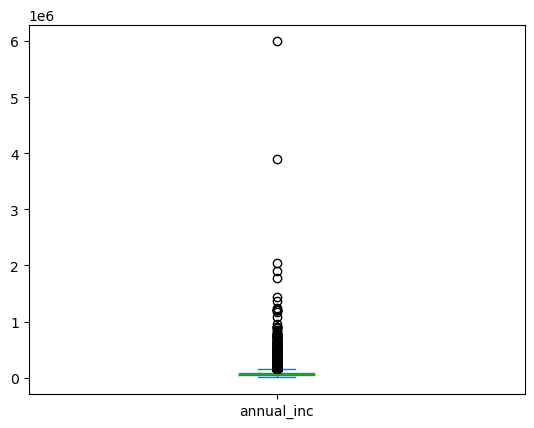

In [128]:
df['annual_inc'].plot(kind='box')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  object        
 1   loan_amnt             39717 non-null  int64         
 2   funded_amnt           39717 non-null  int64         
 3   funded_amnt_inv       39717 non-null  float64       
 4   term                  39717 non-null  int64         
 5   int_rate              39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  int64         
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [130]:
## Remove outliers
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]
df['annual_inc'].describe()


count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64

<Axes: ylabel='Density'>

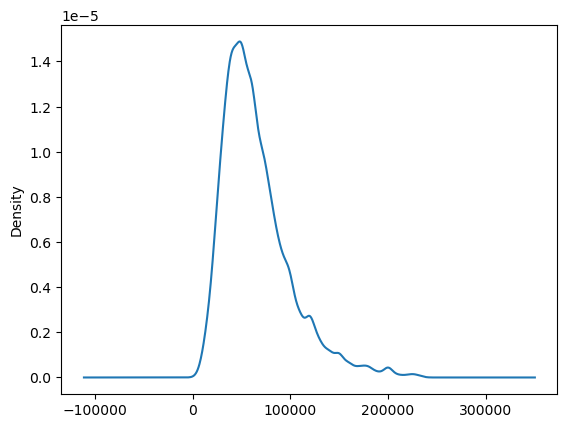

In [131]:
df['annual_inc'].plot(kind='kde')

<Axes: >

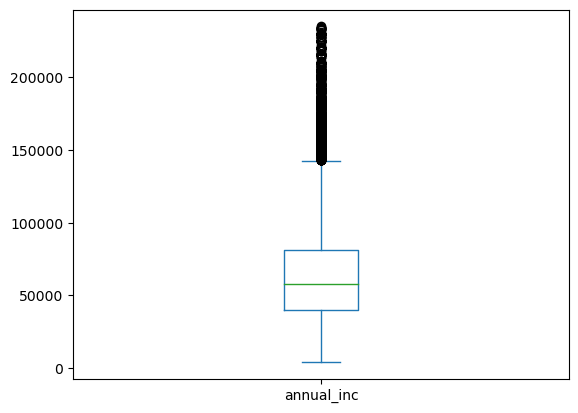

In [132]:
df['annual_inc'].plot(kind='box')

In [133]:
df['annual_inc'].skew()

1.3733705469680089

#### int_rate
#### Conculsion
1. int_rate has outliers however if we closly look at the data the values are high but those can not be consider as outliers
2. Post removal the skewed ness is decreased.

In [134]:
df['int_rate'].describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<Axes: ylabel='Frequency'>

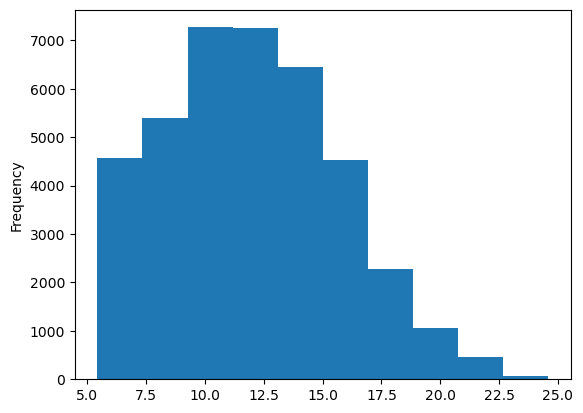

In [135]:
df['int_rate'].plot(kind='hist')

<Axes: ylabel='Density'>

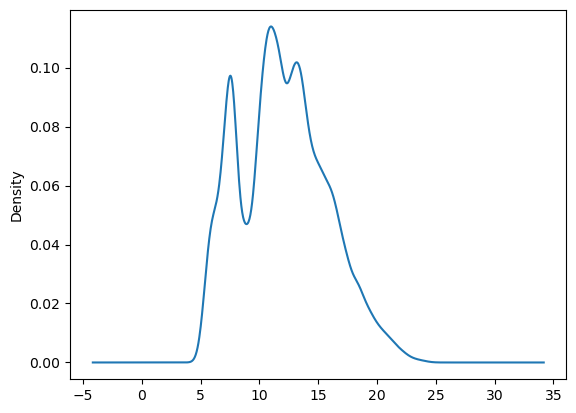

In [136]:
df['int_rate'].plot(kind='kde')

In [137]:
df['int_rate'].skew()

0.29258748316789873

<Axes: >

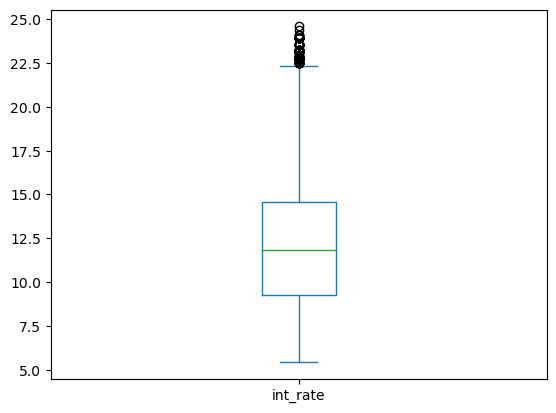

In [138]:
df['int_rate'].plot(kind='box')

In [139]:
df[df['int_rate']>23]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies,issue_d_year,issue_d_month
223,1060644,24250,18100,18075.00,60,23.91,G,G4,7,MORTGAGE,120000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,850xx,AZ,12.96,3,7,0,31992,99,20,f,22206.82,22176.15,18100.00,4106.82,Dec-12,16499.75,NaN,INDIVIDUAL,0.00,2011,12
540,1062756,13000,13000,13000.00,60,23.52,G,G3,10,RENT,61000.00,Source Verified,2011-12-01,Current,debt_consolidation,100xx,NY,11.65,1,10,0,18427,92.10,14,f,19604.66,19604.66,10589.91,9014.75,May-16,370.38,Jun-16,INDIVIDUAL,0.00,2011,12
601,1058624,12375,12375,12375.00,60,23.13,G,G2,5,RENT,40000.00,Not Verified,2011-12-01,Charged Off,other,327xx,FL,20.88,0,27,0,13768,22.50,31,f,8530.26,8530.26,2444.99,4602.60,Jan-14,52.05,NaN,INDIVIDUAL,0.00,2011,12
733,1060753,24925,24925,24900.00,60,23.91,G,G4,4,RENT,60000.00,Verified,2011-12-01,Fully Paid,credit_card,330xx,FL,17.74,2,19,0,14265,98.90,26,f,37823.37,37785.43,24925.00,12898.37,Apr-15,6543.21,NaN,INDIVIDUAL,0.00,2011,12
1156,1055225,29100,29100,29100.00,60,23.91,G,G4,1,RENT,95000.00,Source Verified,2011-12-01,Fully Paid,debt_consolidation,112xx,NY,16.41,0,4,0,3988,99.70,22,f,40059.17,40059.17,29100.00,10959.17,Sep-13,23356.73,NaN,INDIVIDUAL,0.00,2011,12
1199,1054298,18250,18250,18250.00,60,23.52,G,G3,6,OWN,40000.00,Not Verified,2011-12-01,Current,debt_consolidation,336xx,FL,19.20,0,8,0,20240,98.30,16,f,27547.99,27547.99,14876.62,12671.37,May-16,519.95,Jun-16,INDIVIDUAL,0.00,2011,12
1619,1047612,24250,24250,24225.00,60,24.11,G,G5,1,MORTGAGE,108000.00,Verified,2011-12-01,Fully Paid,credit_card,707xx,LA,12.27,2,8,0,17522,99,28,f,35626.82,35590.09,24250.00,11376.82,Apr-14,17453.87,NaN,INDIVIDUAL,0.00,2011,12
1691,1047248,35000,35000,34963.33,60,23.13,G,G2,3,MORTGAGE,220000.00,Source Verified,2011-12-01,Charged Off,home_improvement,926xx,CA,18.36,3,8,0,51941,93.20,28,f,11699.83,11656.24,3431.53,6453.97,Oct-12,989.29,NaN,INDIVIDUAL,0.00,2011,12
1799,1045885,25000,25000,25000.00,60,24.11,G,G5,4,MORTGAGE,145000.00,Verified,2011-12-01,Fully Paid,credit_card,774xx,TX,8.30,0,8,0,12990,97.70,31,f,31602.40,31602.40,25000.00,6602.40,Feb-13,22238.46,NaN,INDIVIDUAL,0.00,2011,12
2075,1040822,21575,21575,21550.00,60,23.91,G,G4,10,RENT,54480.00,Source Verified,2011-12-01,Fully Paid,debt_consolidation,982xx,WA,18.50,1,7,0,16092,98.70,21,f,26082.91,26052.69,21575.00,4507.91,Nov-12,19899.78,NaN,INDIVIDUAL,0.00,2011,12


### Categorical Column
Categorical - grade , sub_grade , home_ownership , verification_status , loan_status , purpose , zip_code , addr_state , initial_list_status , application_type

#### loan_status
#### Conculsion
1. More than 80% have fully paid the load
2. 14% applicant marked as charged off 

<Axes: ylabel='count'>

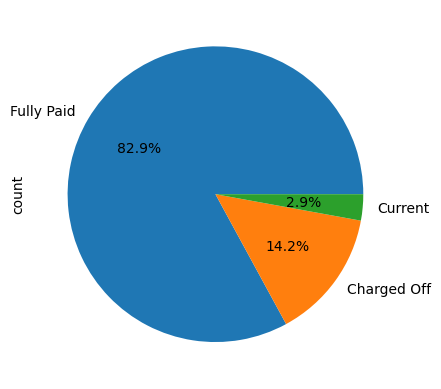

In [140]:
df['loan_status'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### loan_status
#### Conculsion
1. More loans are taken to pay off older debts and liabilities to manage debt consolidation.
2. No 1 Looks scary as applicants are taking loan to pay another loan.
3. It required to see how many active loans they have when applying the loan.

<Axes: xlabel='purpose'>

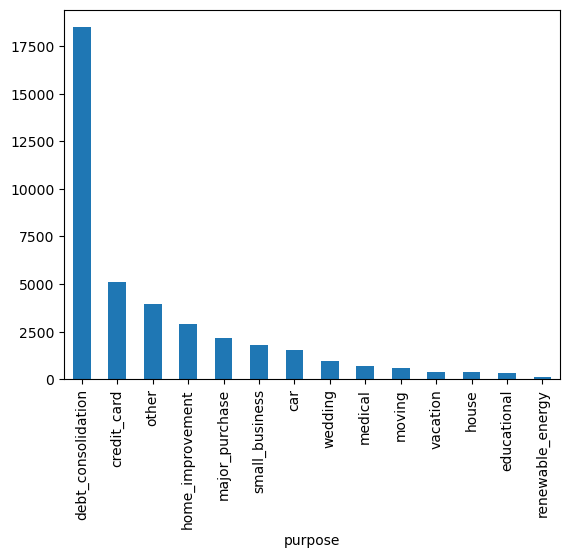

In [141]:
df['purpose'].value_counts().plot(kind='bar')

In [142]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    39319
Name: count, dtype: int64

#### grade
#### Conculsion
1. Grade A and C distributions are nearly same 
2. There are more Appliant with Grade B 

<Axes: ylabel='count'>

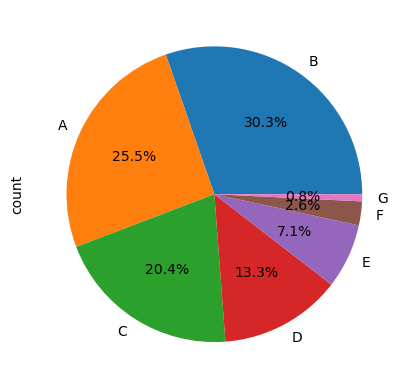

In [143]:
df['grade'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='grade'>

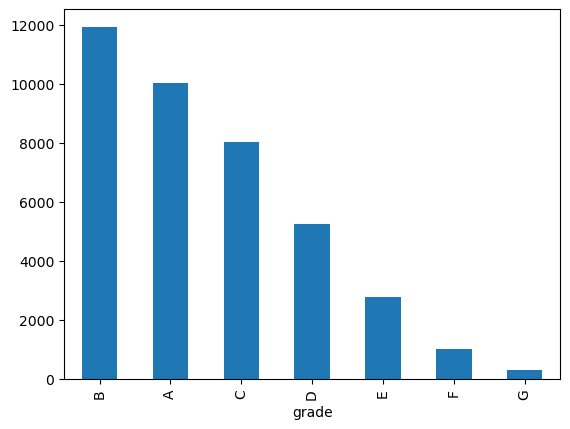

In [144]:
df['grade'].value_counts().plot(kind='bar')

#### verification_status
#### Conculsion
1. Looks like huge number of applicants are not verified which looks like a risk which is around 43%

In [ ]:
## Categorical - grade , sub_grade , home_ownership , verification_status , loan_status , purpose , zip_code , addr_state , initial_list_status , application_type

<Axes: xlabel='verification_status'>

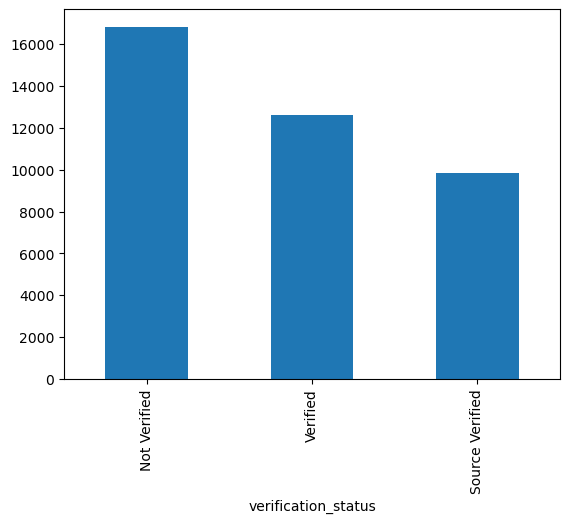

In [145]:
df['verification_status'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

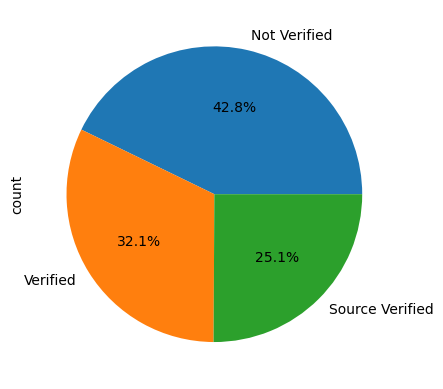

In [146]:
df['verification_status'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### home_ownership
#### Conculsion
1. The details looks like a risk as most of applicant were staying on rent or having mortgage

<Axes: ylabel='count'>

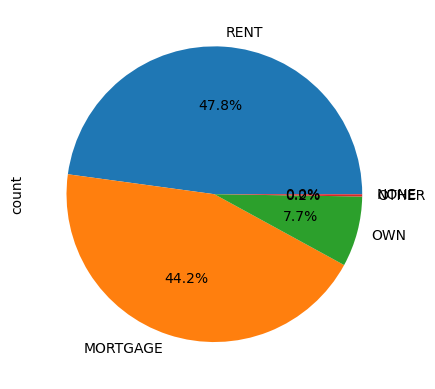

In [147]:
df['home_ownership'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='home_ownership'>

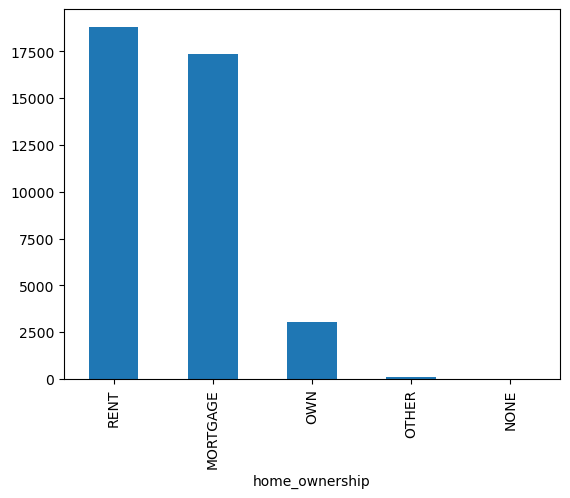

In [148]:
df['home_ownership'].value_counts().plot(kind='bar')

#### term
#### Conculsion
1. more than 70% applicants are opted for 36 terms

<Axes: ylabel='count'>

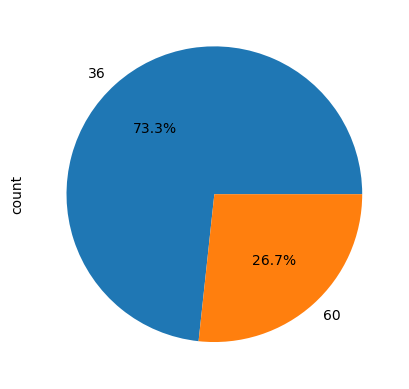

In [149]:
df['term'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='term'>

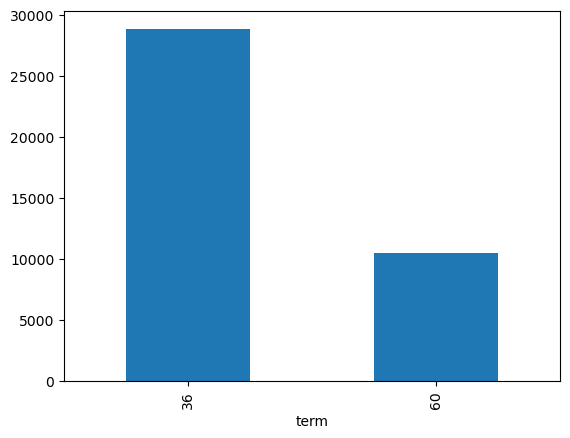

In [150]:
df['term'].value_counts().plot(kind='bar')

In [151]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,5000,4975.00,36,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70,9,f,5863.16,5833.84,5000.00,863.16,Jan-15,171.62,NaN,INDIVIDUAL,0.00,2011,12
1,1077430,2500,2500,2500.00,60,15.27,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40,4,f,1008.71,1008.71,456.46,435.17,Apr-13,119.66,NaN,INDIVIDUAL,0.00,2011,12
2,1077175,2400,2400,2400.00,36,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50,10,f,3005.67,3005.67,2400.00,605.67,Jun-14,649.91,NaN,INDIVIDUAL,0.00,2011,12
3,1076863,10000,10000,10000.00,36,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21,37,f,12231.89,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,INDIVIDUAL,0.00,2011,12
4,1075358,3000,3000,3000.00,60,12.69,B,B5,1,RENT,80000.00,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0,15,0,27783,53.90,38,f,3513.33,3513.33,2475.94,1037.39,May-16,67.79,Jun-16,INDIVIDUAL,0.00,2011,12


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39319 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39319 non-null  object        
 1   loan_amnt             39319 non-null  int64         
 2   funded_amnt           39319 non-null  int64         
 3   funded_amnt_inv       39319 non-null  float64       
 4   term                  39319 non-null  int64         
 5   int_rate              39319 non-null  float64       
 6   grade                 39319 non-null  object        
 7   sub_grade             39319 non-null  object        
 8   emp_length            39319 non-null  int64         
 9   home_ownership        39319 non-null  object        
 10  annual_inc            39319 non-null  float64       
 11  verification_status   39319 non-null  object        
 12  issue_d               39319 non-null  datetime64[ns]
 13  loan_status          

### Derive Column Data Univariate analysis

#### annual_inc_cats
#### Conculsion
1. Max applicant has annual income from 40k to 60k
2. 80k+ , 60K-80K, 20K to 40K nearly they have equal percentage of salary range.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39319 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39319 non-null  object        
 1   loan_amnt             39319 non-null  int64         
 2   funded_amnt           39319 non-null  int64         
 3   funded_amnt_inv       39319 non-null  float64       
 4   term                  39319 non-null  int64         
 5   int_rate              39319 non-null  float64       
 6   grade                 39319 non-null  object        
 7   sub_grade             39319 non-null  object        
 8   emp_length            39319 non-null  int64         
 9   home_ownership        39319 non-null  object        
 10  annual_inc            39319 non-null  float64       
 11  verification_status   39319 non-null  object        
 12  issue_d               39319 non-null  datetime64[ns]
 13  loan_status          

In [153]:
bin_edges = [0, 20000, 40000, 60000, 80000,1000000]
bin_lables = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +']
df['annual_inc_cats'] = pd.cut(df['annual_inc'],bins= bin_edges ,labels= bin_lables)

<Axes: xlabel='annual_inc_cats'>

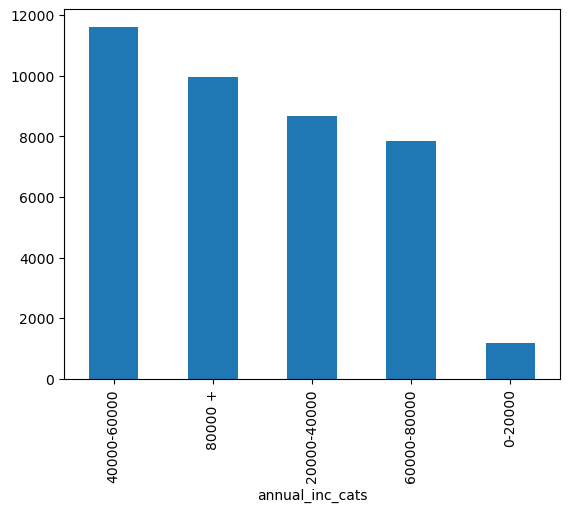

In [154]:
df['annual_inc_cats'].value_counts().plot(kind ='bar')

<Axes: ylabel='count'>

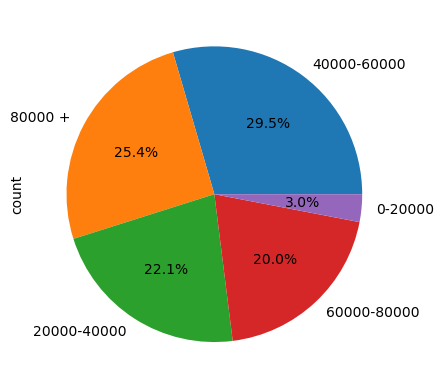

In [155]:
df['annual_inc_cats'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### loan_amnt_cats
#### Conculsion
1. 0-7K and 7K-14k most of the applicants applied for this loan amount.

In [156]:
bin_edges = [0, 7000, 14000, 21000, 28000, 35000]
bin_lables = ['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +']
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'],bins=bin_edges, labels=bin_lables)

<Axes: ylabel='count'>

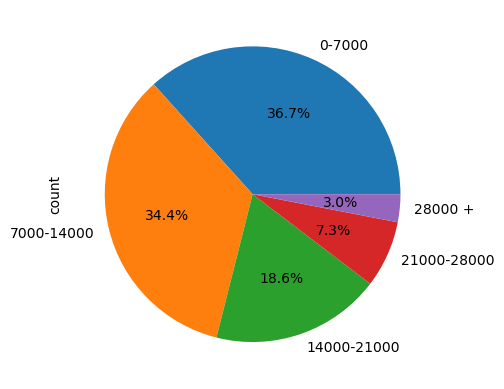

In [157]:
df['loan_amnt_cats'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### int_rate_cats
#### Conculsion
1. Nearly 70% of applicant have more than 10% interest which is also a high number.
2. 12.7 % having 16+ interest rate may have loan_status as charged_off

In [158]:
bin_edges = [0, 10, 12.5, 16, 20]
bin_lables = ['0-10', '10-13', '12.5-16', '16 +']
df['int_rate_cats'] = pd.cut(df['int_rate'],bins= bin_edges , labels=bin_lables)


<Axes: ylabel='count'>

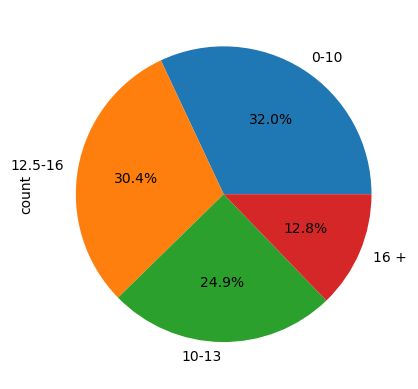

In [159]:
df['int_rate_cats'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### dti_cats
#### Conculsion
1. Low DTI are more attractive to loan approval
2. DTI above 15 may contain applicant with loan_status as charged off

In [160]:
bin_edges = [0, 5, 10, 15, 20, 25]
bin_lables = ['0-5', '05-10', '10-15', '15-20', '25+']
df['dti_cats'] = pd.cut(df['dti'],bins= bin_edges , labels=bin_lables)


<Axes: ylabel='count'>

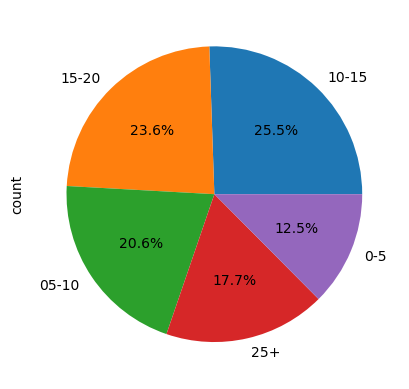

In [161]:
df['dti_cats'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Bivariate Analysis


# Bivariate Analysis on annual income against charged-off proportion
## Conculsion
- Applicants with Higher salary has lesser chance to be charged_off.
- Salary range between 0-20K has more chances of charged off.
- As the salary grows the charge-off proportion goes down.

In [162]:
inc_vs_loan_status = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_vs_loan_status['Total'] = inc_vs_loan_status['Charged Off'] + inc_vs_loan_status['Current'] + inc_vs_loan_status['Fully Paid'] 
inc_vs_loan_status['charged_off_proportion'] = inc_vs_loan_status['Charged Off'] / inc_vs_loan_status['Total']
inc_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,charged_off_proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


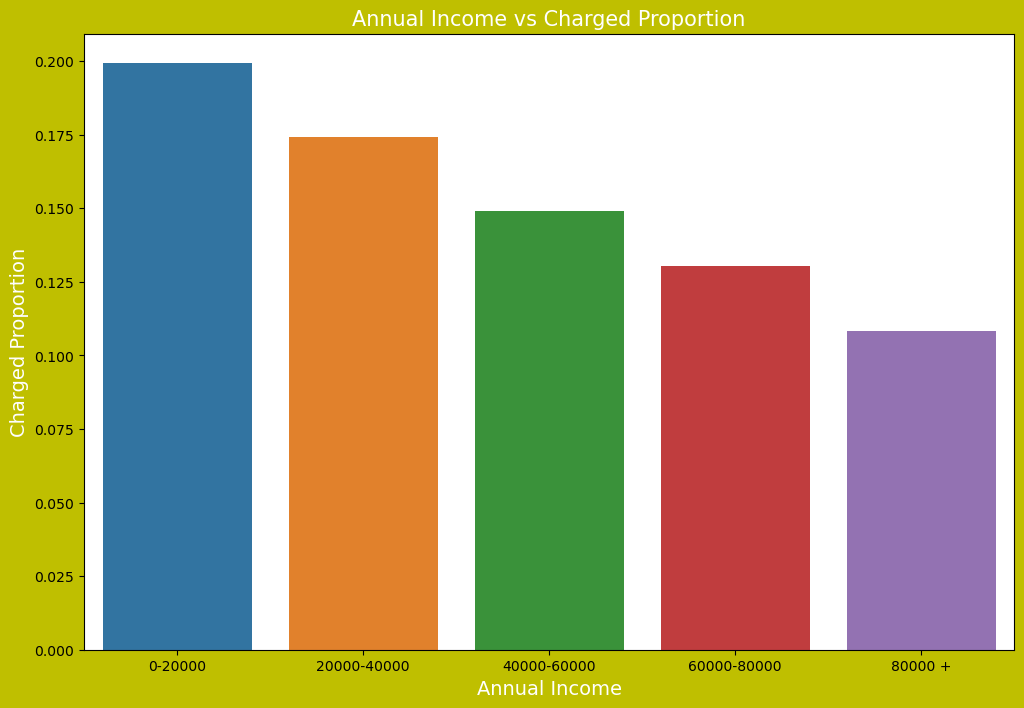

In [163]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Annual Income vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='charged_off_proportion', data=inc_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on emp_length against charged-off proportion
## Conculsion
- Applicant with No employement exprience or zero employment period has higher charged of propertion.
- Looking at the data its difficult to deduce the impact of the emp_length on the charged off as the proportion are almost same.

In [164]:
emp_length_vs_loan_status = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Current'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['charged_off_proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,charged_off_proportion
0,0,227,42,801,1070,0.21
10,10,1316,386,7038,8740,0.15
7,7,262,62,1435,1759,0.15
1,1,1090,143,6533,7766,0.14
5,5,456,87,2712,3255,0.14
8,8,203,43,1216,1462,0.14
6,6,305,58,1846,2209,0.14
3,3,551,82,3426,4059,0.14
4,4,456,94,2860,3410,0.13
2,2,561,97,3684,4342,0.13


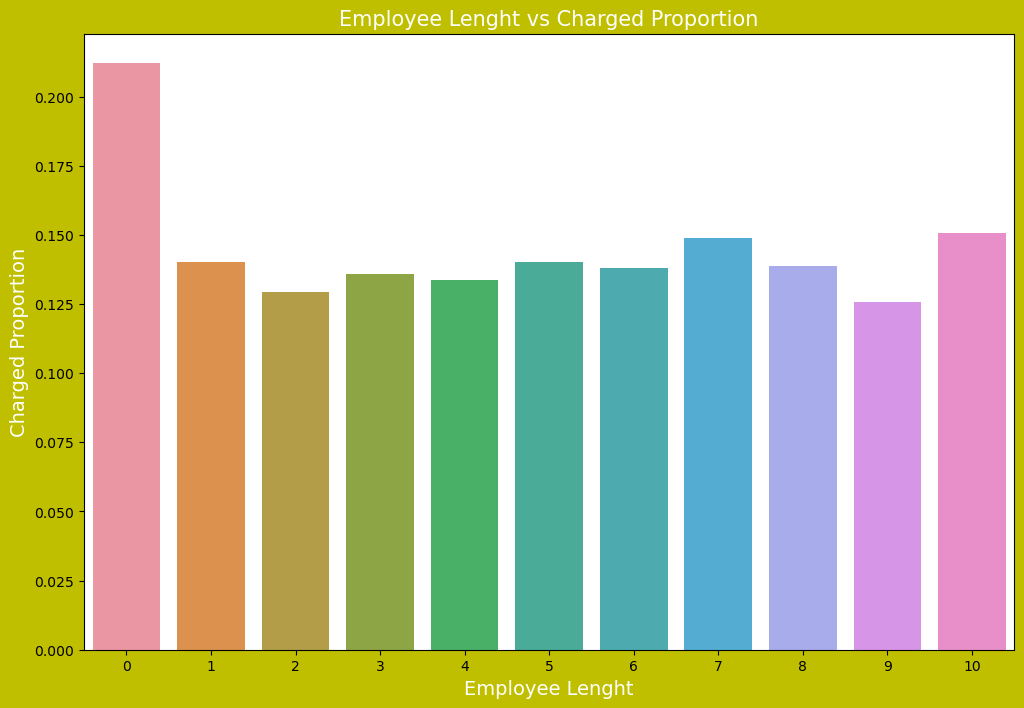

In [165]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Employee Lenght vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='emp_length', y='charged_off_proportion', data=emp_length_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Employee Lenght',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on grade against charged-off proportion
## Conculsion
- Grade A employee has lower charged-off proportion.
- Charged off proportion increases when the grade decreases. Lower the grade having higher charge-off proportion.

In [166]:
grade_vs_loan_status = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Current'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['charged_off_proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,charged_off_proportion
6,G,99,17,190,306,0.32
5,F,312,71,642,1025,0.30
4,E,704,176,1906,2786,0.25
3,D,1112,216,3916,5244,0.21
2,C,1342,262,6411,8015,0.17
1,B,1414,344,10167,11925,0.12
0,A,601,40,9377,10018,0.06


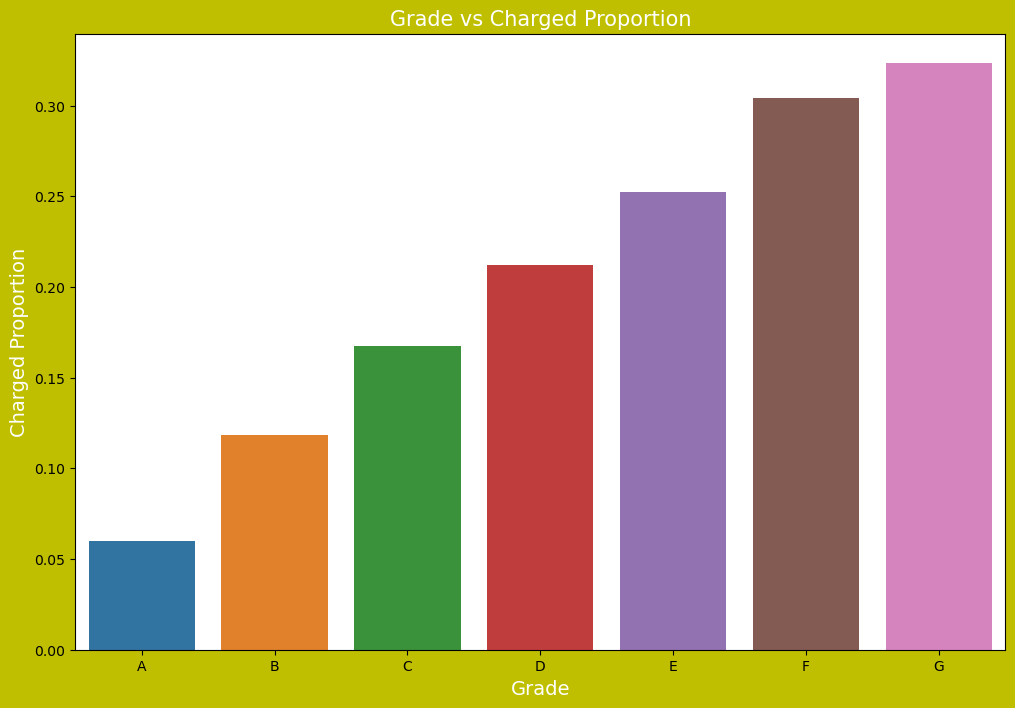

In [167]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Grade vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='grade', y='charged_off_proportion', data=grade_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Grade',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on purpose against charged-off proportion
## Conculsion
- Small business has higer charged off proportion.

In [168]:
purpose_vs_loan_status = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Current'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['charged_off_proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,charged_off_proportion
11,small_business,472.00,74.00,1251.00,1797.00,0.26
10,renewable_energy,19.00,1.00,81.00,101.00,0.19
3,educational,55.00,0.00,268.00,323.00,0.17
9,other,629.00,126.00,3203.00,3958.00,0.16
8,moving,91.00,7.00,479.00,577.00,0.16
5,house,58.00,14.00,299.00,371.00,0.16
7,medical,106.00,12.00,568.00,686.00,0.15
2,debt_consolidation,2752.00,580.00,15165.00,18497.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,338.00,97.00,2459.00,2894.00,0.12


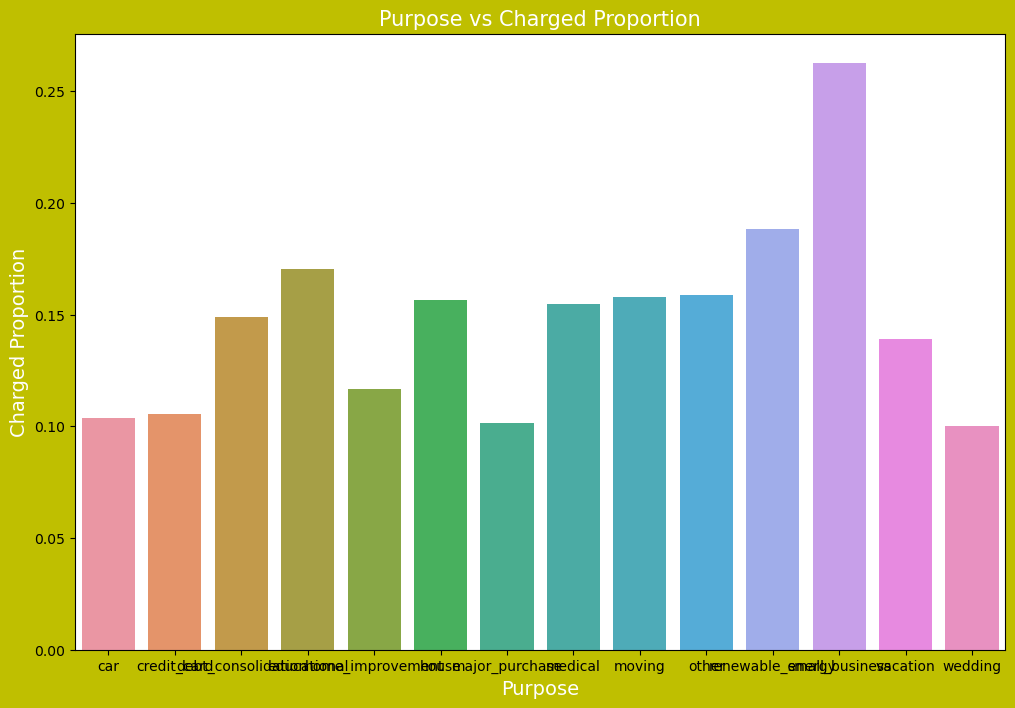

In [169]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Purpose vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='purpose', y='charged_off_proportion', data=purpose_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Purpose',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on int_rate against charged-off proportion
## Conculsion
- Higher the rate higher the charged-off proportion
- lower interest rate between 0-10 having  lower charged off proportion

In [172]:
int_rate_vs_loan_status = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_vs_loan_status['Total'] = int_rate_vs_loan_status['Charged Off'] + int_rate_vs_loan_status['Current'] + int_rate_vs_loan_status['Fully Paid'] 
int_rate_vs_loan_status['charged_off_proportion'] = int_rate_vs_loan_status['Charged Off'] / int_rate_vs_loan_status['Total']
int_rate_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,charged_off_proportion
3,16 +,1250,351,3317,4918,0.25
2,12.5-16,1995,329,9354,11678,0.17
1,10-13,1224,269,8083,9576,0.13
0,0-10,825,77,11403,12305,0.07


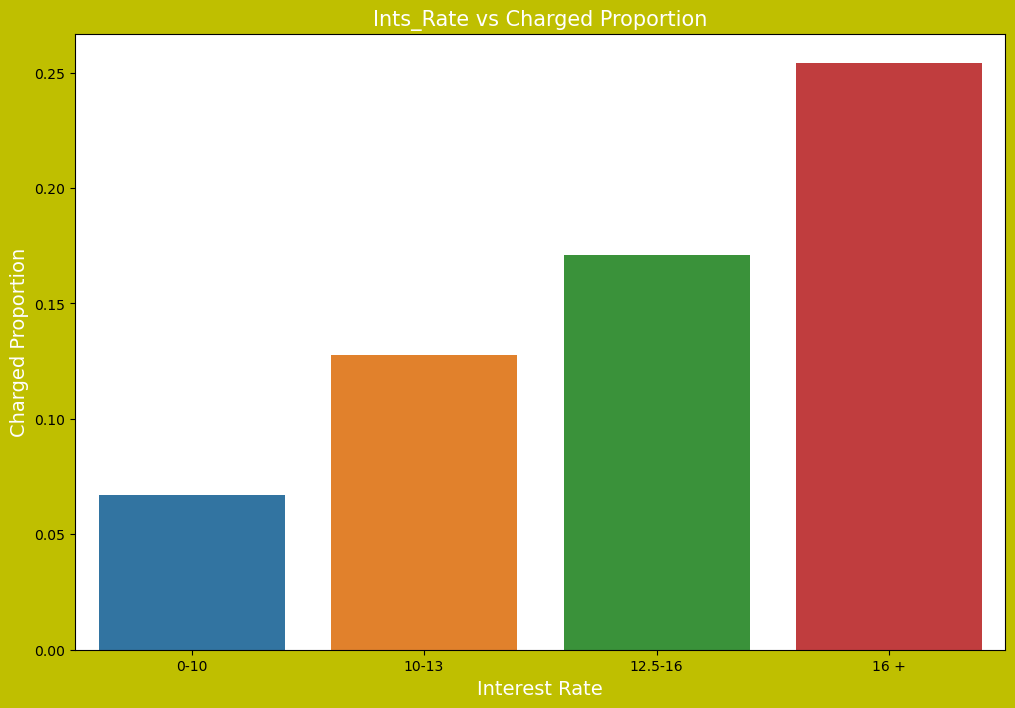

In [173]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Ints_Rate vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='int_rate_cats', y='charged_off_proportion', data=int_rate_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on address against charged-off proportion
## Conculsion
- State NE has higher of charged-off proportion.
- FL , CA , NY have high charged off values.

In [174]:
addr_state_vs_loan_status = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Current'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['charged_off_proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,charged_off_proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,107.00,17.00,368.00,492.00,0.22
40,SD,12.00,2.00,50.00,64.00,0.19
0,AK,14.00,2.00,63.00,79.00,0.18
9,FL,497.00,85.00,2252.00,2834.00,0.18
24,MO,114.00,16.00,551.00,681.00,0.17
13,ID,1.00,0.00,5.00,6.00,0.17
31,NM,30.00,5.00,149.00,184.00,0.16
11,HI,28.00,8.00,138.00,174.00,0.16
4,CA,1116.00,149.00,5767.00,7032.00,0.16


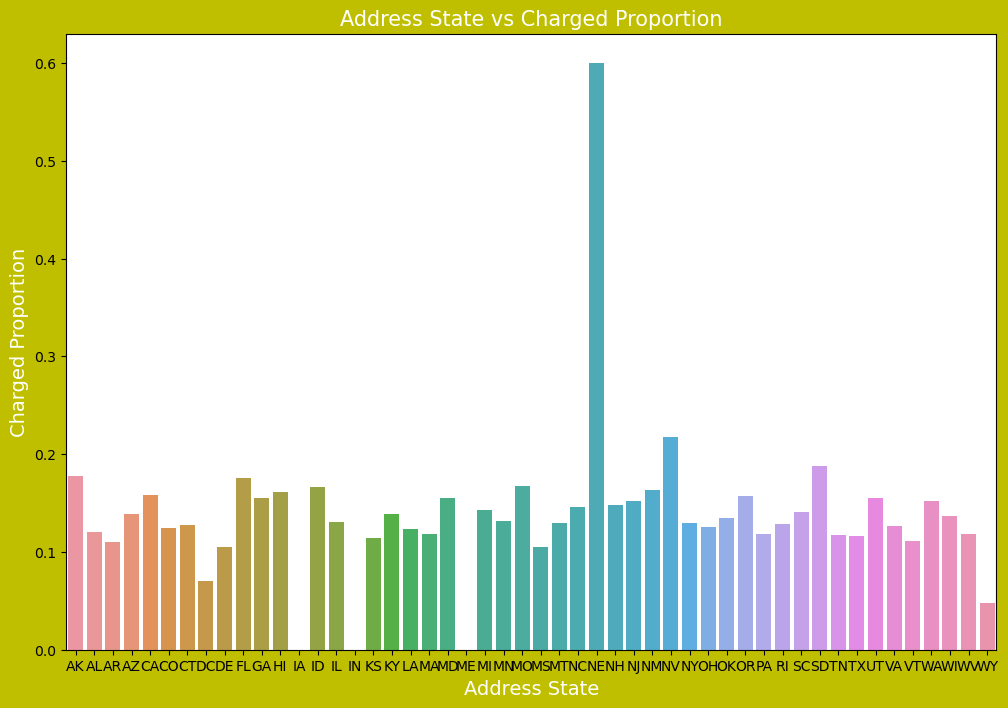

In [175]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Address State vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='addr_state', y='charged_off_proportion', data=addr_state_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Address State',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on verification_status against charged-off proportion
## Conculsion
- Its difficult to inference anything as the charged off proportion are nearly same.

In [176]:
ver_status_vs_loan_status = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ver_status_vs_loan_status['Total'] = ver_status_vs_loan_status['Charged Off'] + ver_status_vs_loan_status['Current'] + ver_status_vs_loan_status['Fully Paid'] 
ver_status_vs_loan_status['charged_off_proportion'] = ver_status_vs_loan_status['Charged Off'] / ver_status_vs_loan_status['Total']
ver_status_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,charged_off_proportion
2,Verified,2032,593,10000,12625,0.16
1,Source Verified,1422,306,8135,9863,0.14
0,Not Verified,2130,227,14474,16831,0.13


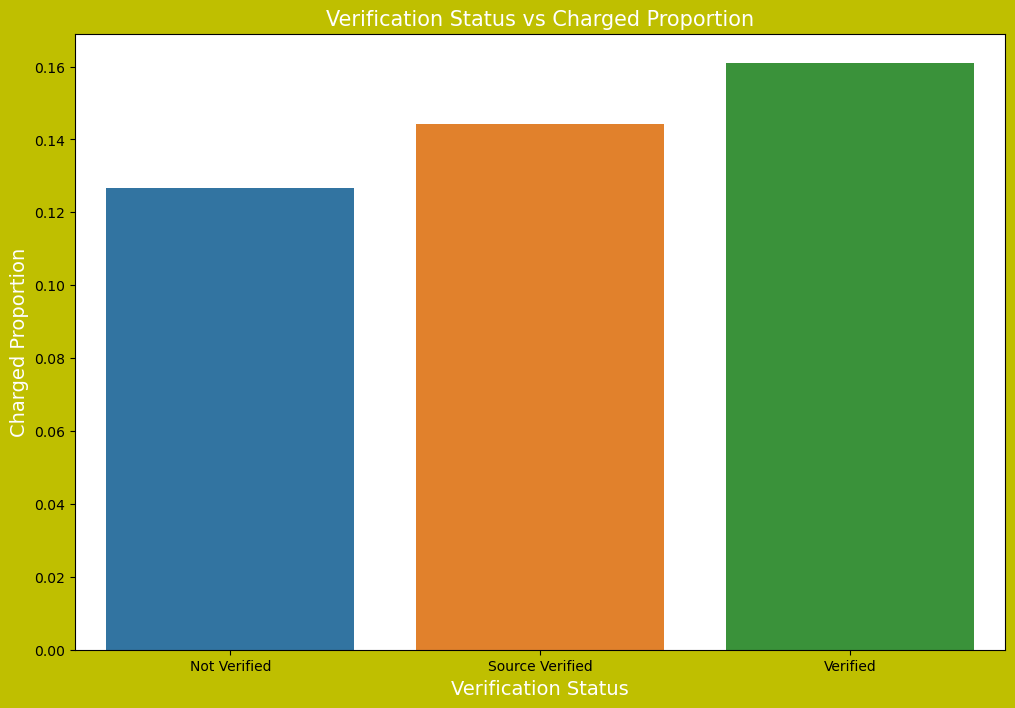

In [177]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Verification Status vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='verification_status', y='charged_off_proportion', data=ver_status_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on pub_rec_bankruptcies against charged-off proportion
## Conculsion
- Applicant who has bankruppted they have more charged off proportion value. They falls into the chanrged off status.

In [178]:
pub_rec_bankruptcies_vs_loan_status = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan_status['Total'] = pub_rec_bankruptcies_vs_loan_status['Charged Off'] + pub_rec_bankruptcies_vs_loan_status['Current'] + pub_rec_bankruptcies_vs_loan_status['Fully Paid'] 
pub_rec_bankruptcies_vs_loan_status['charged_off_proportion'] = pub_rec_bankruptcies_vs_loan_status['Charged Off'] / pub_rec_bankruptcies_vs_loan_status['Total']
pub_rec_bankruptcies_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,charged_off_proportion
2,2.00,2,2,3,7,0.29
1,1.00,365,37,1268,1670,0.22
0,0.00,5217,1087,31338,37642,0.14


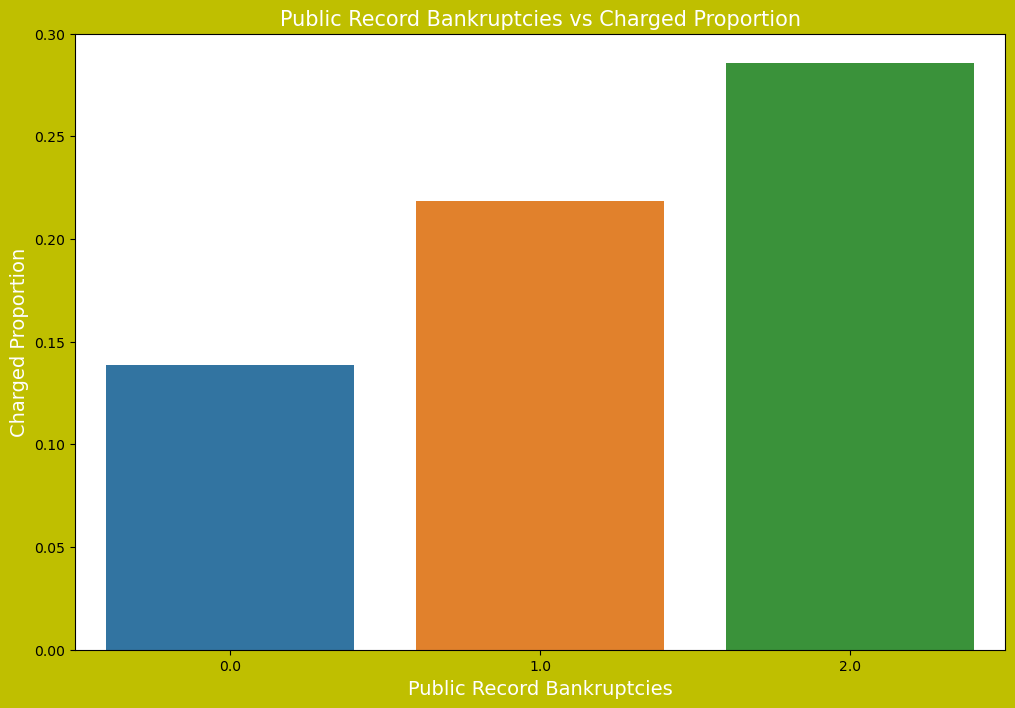

In [179]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Public Record Bankruptcies vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='charged_off_proportion', data=pub_rec_bankruptcies_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Public Record Bankruptcies',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on pub_rec against charged-off proportion
## Conculsion
- if the applicants has legal debt-related matters they have higer charged off proportion.
- Lender would have a risk to approve loan for those applicants.

In [180]:
pub_rec_vs_loan_status = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_vs_loan_status['Total'] = pub_rec_vs_loan_status['Charged Off'] + pub_rec_vs_loan_status['Current'] + pub_rec_vs_loan_status['Fully Paid'] 
pub_rec_vs_loan_status['charged_off_proportion'] = pub_rec_vs_loan_status['Charged Off'] / pub_rec_vs_loan_status['Total']
pub_rec_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,charged_off_proportion
1,1,454.00,43.00,1551.00,2048.00,0.22
2,2,10.00,3.00,37.00,50.00,0.20
0,0,5120.00,1080.00,31012.00,37212.00,0.14
3,3,0.00,0.00,7.00,7.00,0.00
4,4,0.00,0.00,2.00,2.00,0.00


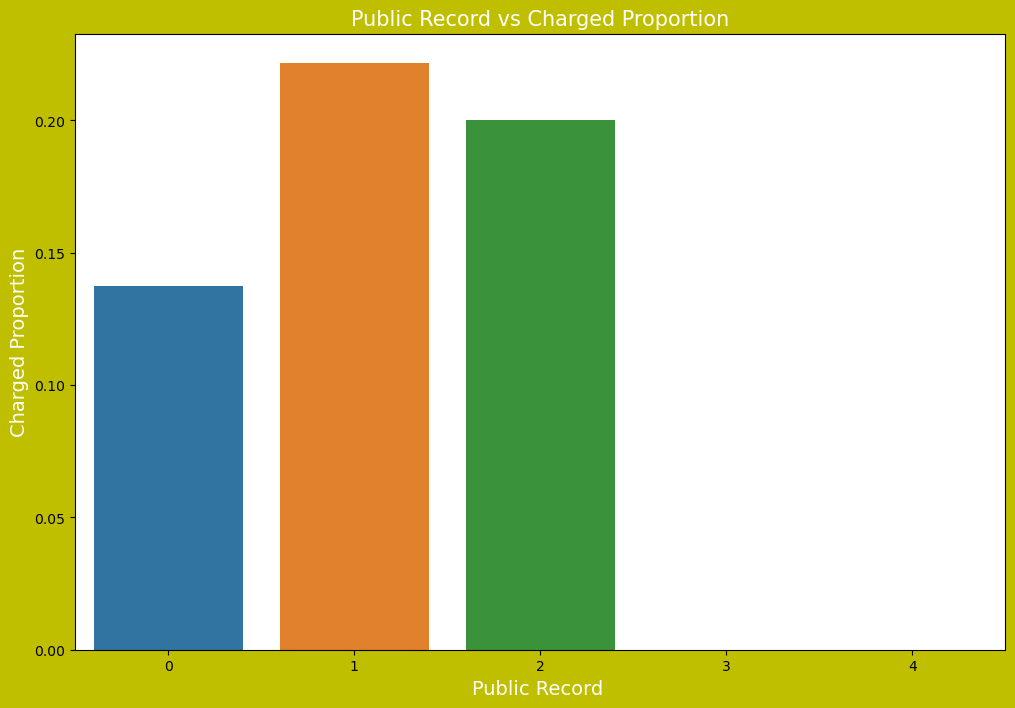

In [181]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Public Record vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='pub_rec', y='charged_off_proportion', data=pub_rec_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Public Record ',fontsize=14,color='w')
plt.show()

# Bivariate Analysis on dti against charged-off proportion
## Conculsion
- if the applicants has legal debt-related matters they have higer charged off proportion.
- Lender would have a risk to approve loan for those applicants.

In [184]:
dti_vs_loan_status = df.groupby(['dti', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan_status['Total'] = dti_vs_loan_status['Charged Off'] + dti_vs_loan_status['Current'] + dti_vs_loan_status['Fully Paid'] 
dti_vs_loan_status['charged_off_proportion'] = dti_vs_loan_status['Charged Off'] / dti_vs_loan_status['Total']
dti_vs_loan_status.sort_values('charged_off_proportion', ascending=False)

loan_status,dti,Charged Off,Current,Fully Paid,Total,charged_off_proportion
2550,25.61,1.00,0.00,0.00,1.00,1.00
2790,28.77,1.00,0.00,0.00,1.00,1.00
2657,27.00,1.00,0.00,0.00,1.00,1.00
2653,26.94,1.00,0.00,0.00,1.00,1.00
2681,27.34,1.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...
280,2.81,0.00,0.00,5.00,5.00,0.00
278,2.79,0.00,0.00,7.00,7.00,0.00
275,2.76,0.00,0.00,6.00,6.00,0.00
273,2.74,0.00,0.00,8.00,8.00,0.00


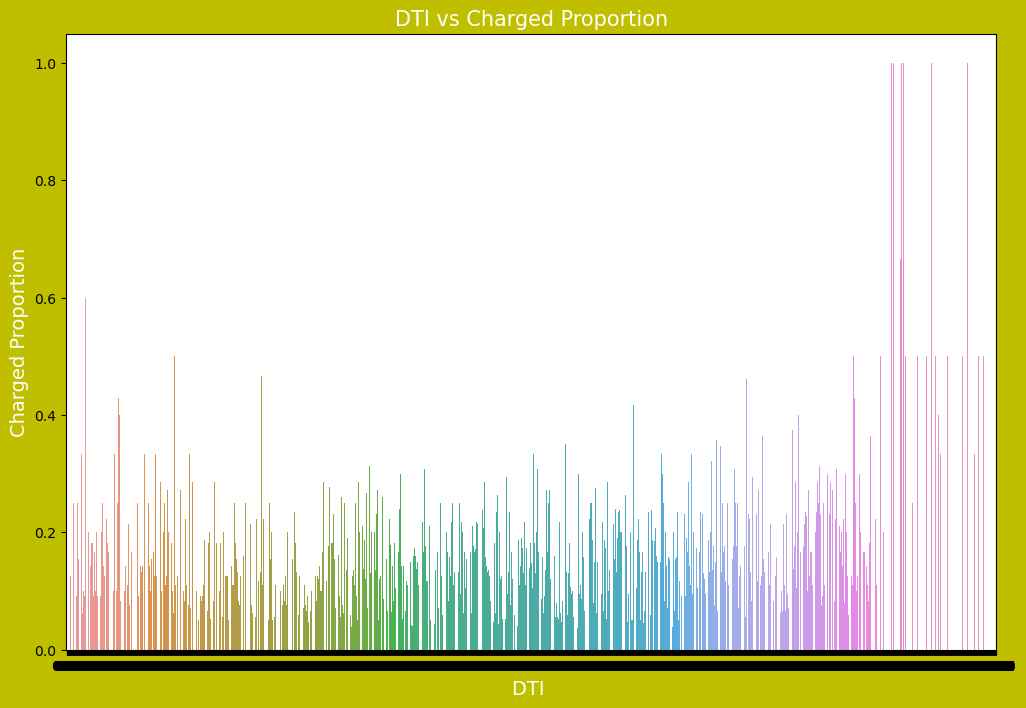

In [185]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('DTI vs Charged Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='dti', y='charged_off_proportion', data=dti_vs_loan_status)
ax1.set_ylabel('Charged Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('DTI ',fontsize=14,color='w')
plt.show()

## Conclusion
1. Term and int_rate has positive correlations
2. Annual income and loan_amount has positive correlation
3. dti and annual income has negative correlation
4. Annual income and emp_length has positive correlation

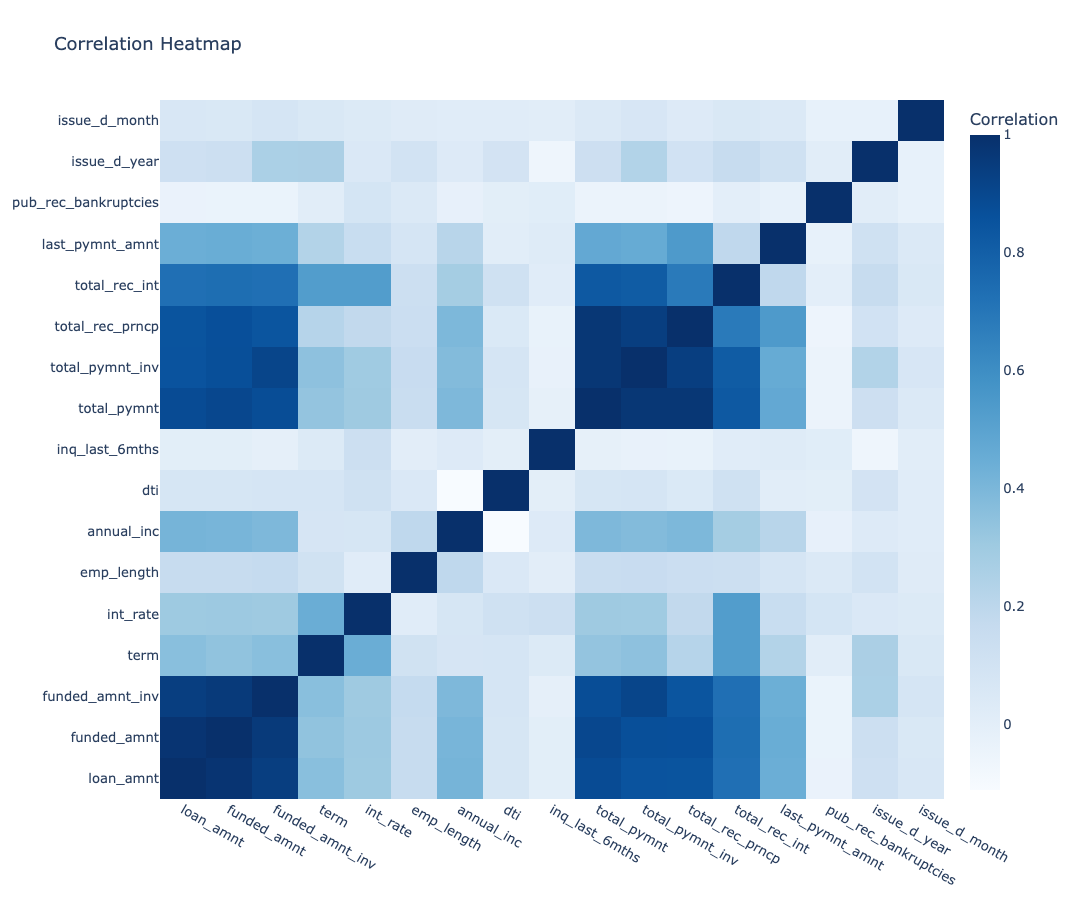

In [566]:
data_corr = df.corr(numeric_only=True)

heatmap_fig = go.Figure(go.Heatmap(
    z=data_corr.values,
    x=data_corr.columns,
    y=data_corr.columns,
    colorscale="Blues",
    colorbar=dict(title="Correlation"),
    customdata=data_corr.values,
    hovertemplate="Correlation: %{customdata:.2f}<extra></extra>"
))

# Set layout properties
font_scale = 1.1
heatmap_fig.update_layout(
    title='Correlation Heatmap',
    height=900,
    width=1200,
    font=dict(size=font_scale * 12)
)

heatmap_fig.show()